In [1]:
%load_ext autotimebar

Label(value='0s')

In [2]:
import subprocess
subprocess.run(['python', 'gen_stats.py'])

Label(value='0s')

There are 64 start in the simulation.
There are 22 goals in the simulation.
There are 24 agents in the simulation.
Running Simulation with task distribution estimation...
Path collisions:  0
Switch collisions:  0
Confronto tra costi teorici e costi reali: 
Costo stimato:  2401
Costo reale:  2587
Saving stats in stats_with_learning.csv...
Saving estimated and real costs per task in costs_learning.csv...
Running Simulation with fixed task distribution...
Path collisions:  0
Switch collisions:  0
Confronto tra costi teorici e costi reali: 
Costo stimato:  2128
Costo reale:  2263
Saving stats in stats_without_learning.csv...
Saving estimated and real costs per task in costs.csv...


CompletedProcess(args=['python', 'gen_stats.py'], returncode=0)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

df_learning = pd.read_csv("stats_with_learning.csv")
df = pd.read_csv("stats_without_learning.csv")

number_of_tasks = df["number_of_tasks"].iloc[0]

df = df.drop(["number_of_tasks"], axis=1)
df_learning = df_learning.drop(["number_of_tasks"], axis=1)

print("Stats with Task Distribution Estimation\n", df_learning)
print("Stats without Task Distribution Estimation\n", df)

Label(value='0s')

Stats with Task Distribution Estimation
      time  costs  serv_times  start_to_pickup_times  pickup_to_goal_times  \
0       0      0    0.000000               0.000000              0.000000   
1       1     72    0.000000               0.000000              0.000000   
2       2     96    0.000000               0.000000              0.000000   
3       3    120    0.000000               0.000000              0.000000   
4       4    144    0.000000               0.000000              0.000000   
..    ...    ...         ...                    ...                   ...   
461   461  11112   38.262473              10.273319             29.592191   
462   462  11136   38.255411              10.281385             29.603896   
463   463  11160   38.248380              10.289417             29.615551   
464   464  11184   38.241379              10.297414             29.627155   
465   465  11208   38.288172              10.305376             29.662366   

     runtimes  
0    0.333917  
1 

In [4]:
dfCosts = pd.read_csv("costs.csv")
dfCostsLearning = pd.read_csv("costs_learning.csv")

print(sum(dfCosts['estimated']), sum(dfCosts['real']))
print(sum(dfCostsLearning['estimated']), sum(dfCostsLearning['real']))

Label(value='0s')

2128 2263
2401 2587


Label(value='0s')

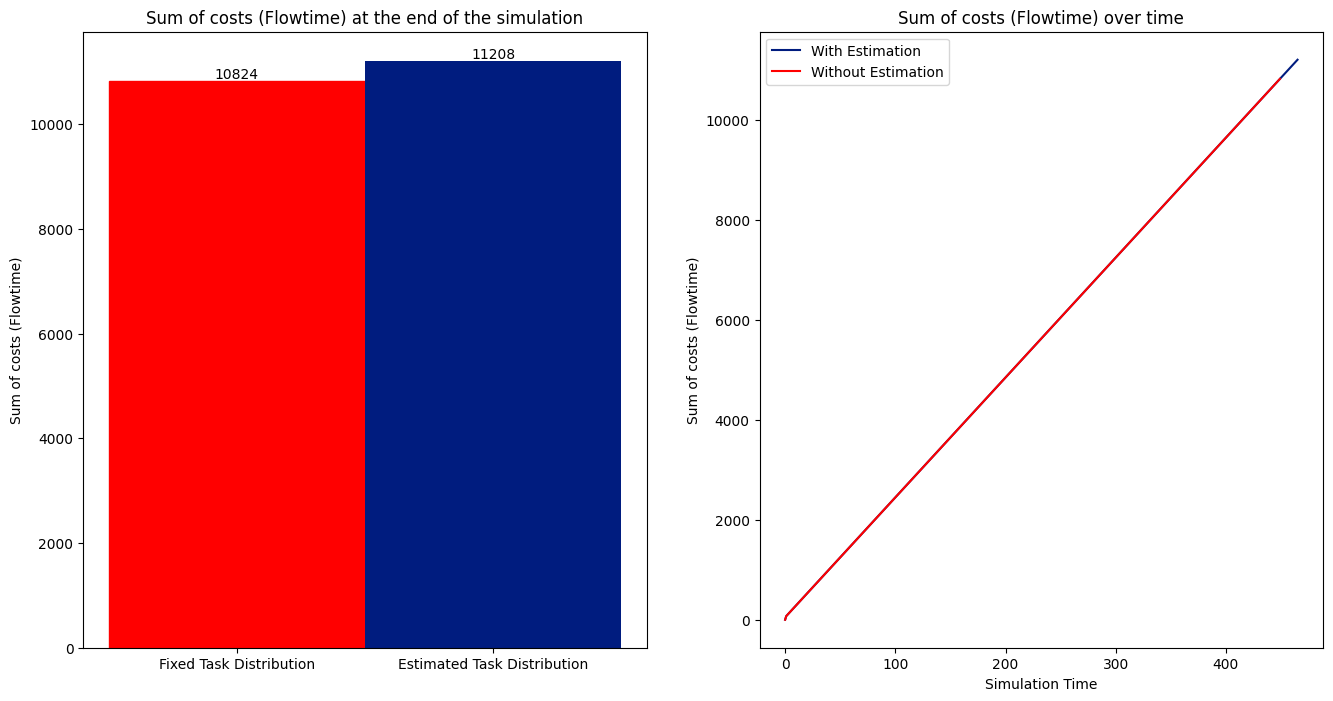

In [5]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Sum of costs (Flowtime) at the end of the simulation")
ax[0].set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Estimation")
ax[1].plot(df["time"], df["costs"], label="Without Estimation", color="r")
ax[1].set_title("Sum of costs (Flowtime) over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Sum of costs (Flowtime)")

ax[1].legend()

plt.show()

Label(value='0s')

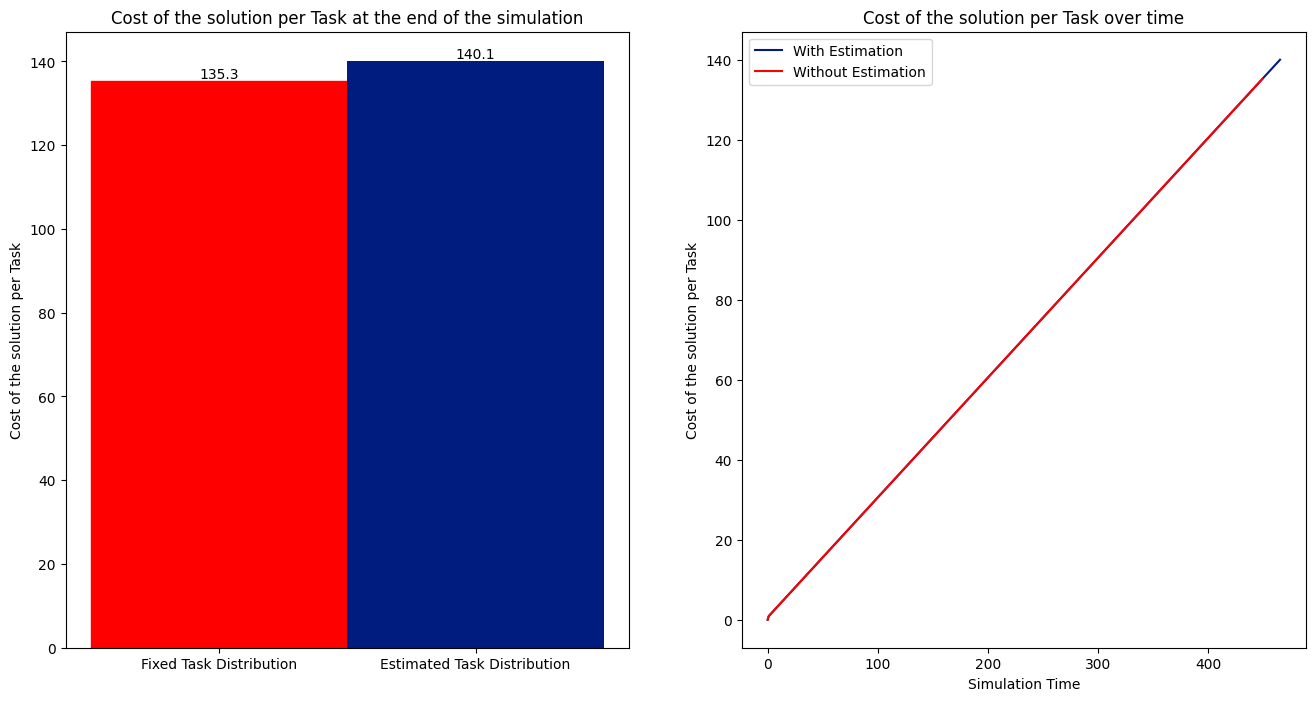

In [6]:
costs_per_task = df['costs'].apply(lambda x: x / number_of_tasks)
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / number_of_tasks)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Estimation")
ax[1].plot(df["time"], costs_per_task, label="Without Estimation", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

Label(value='0s')

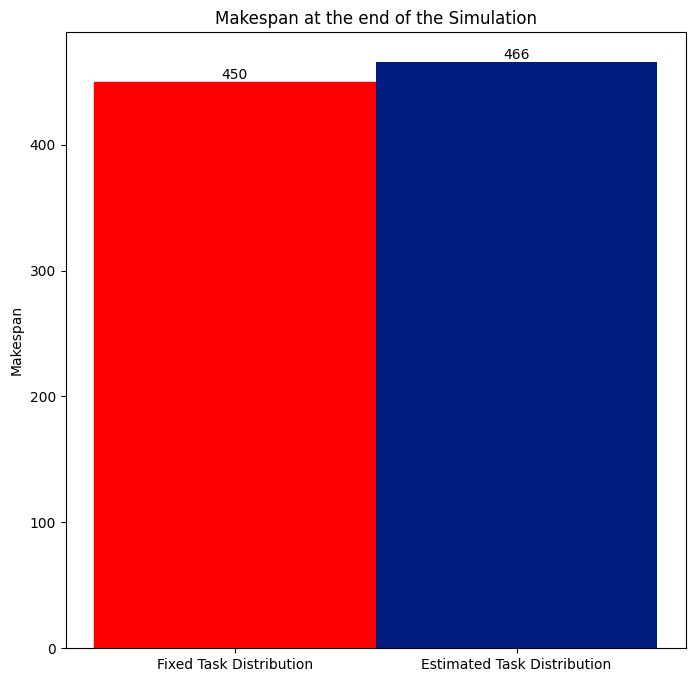

In [7]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(8, 8))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

Label(value='0s')

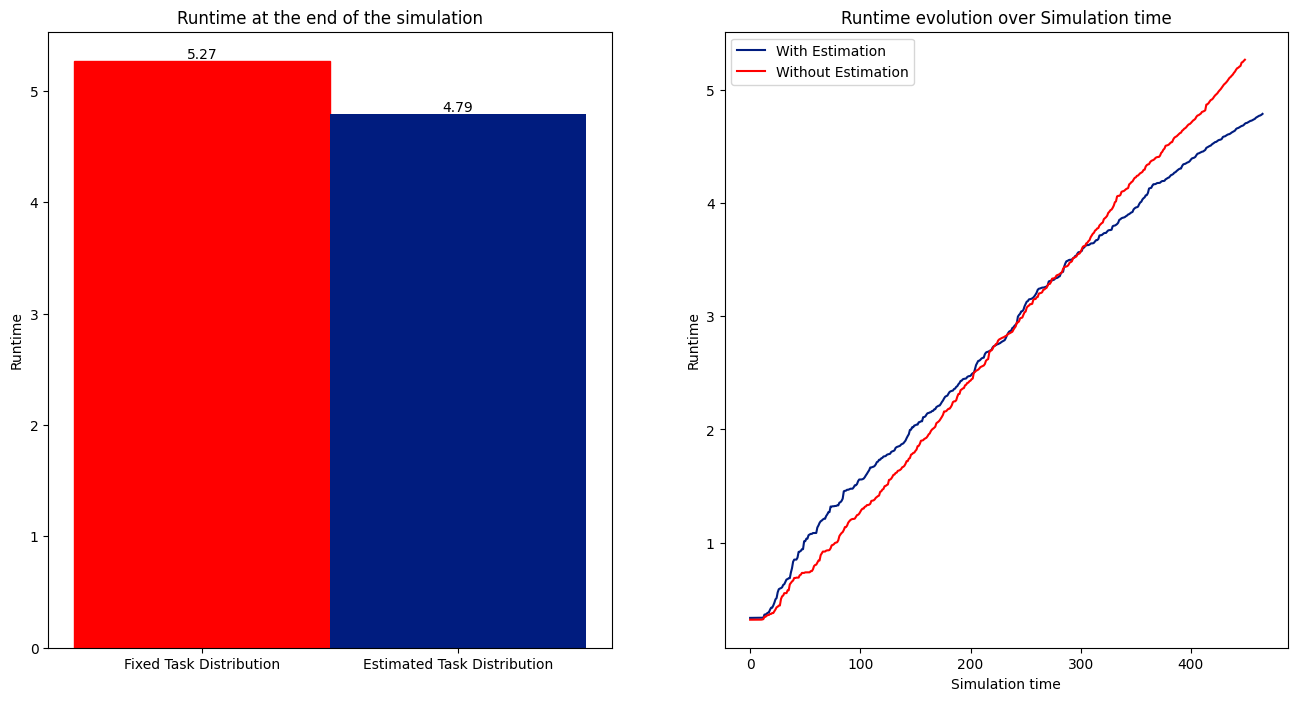

In [8]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Estimation")
ax[1].plot(df["time"], df["runtimes"], label="Without Estimation", color="r")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

Label(value='0s')

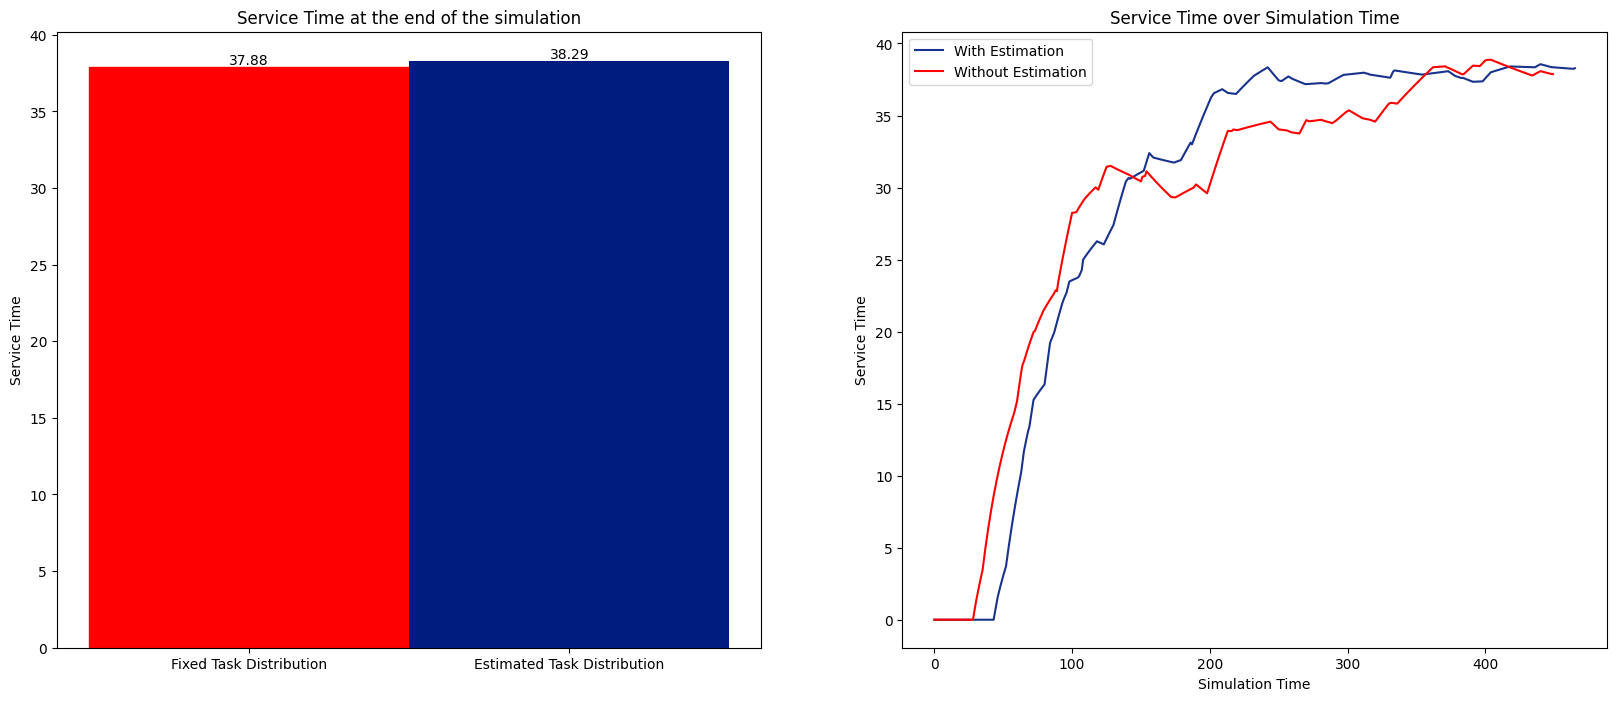

In [9]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["serv_times"].iloc[-1], df_learning["serv_times"].iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["serv_times"].iloc[-1]), "{:.2f}".format(df_learning["serv_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Service Time at the end of the simulation")
ax[0].set_ylabel("Service Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["serv_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["serv_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Service Time')
ax[1].set_xlabel('Simulation Time')
ax[1].set_title('Service Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()

Label(value='0s')

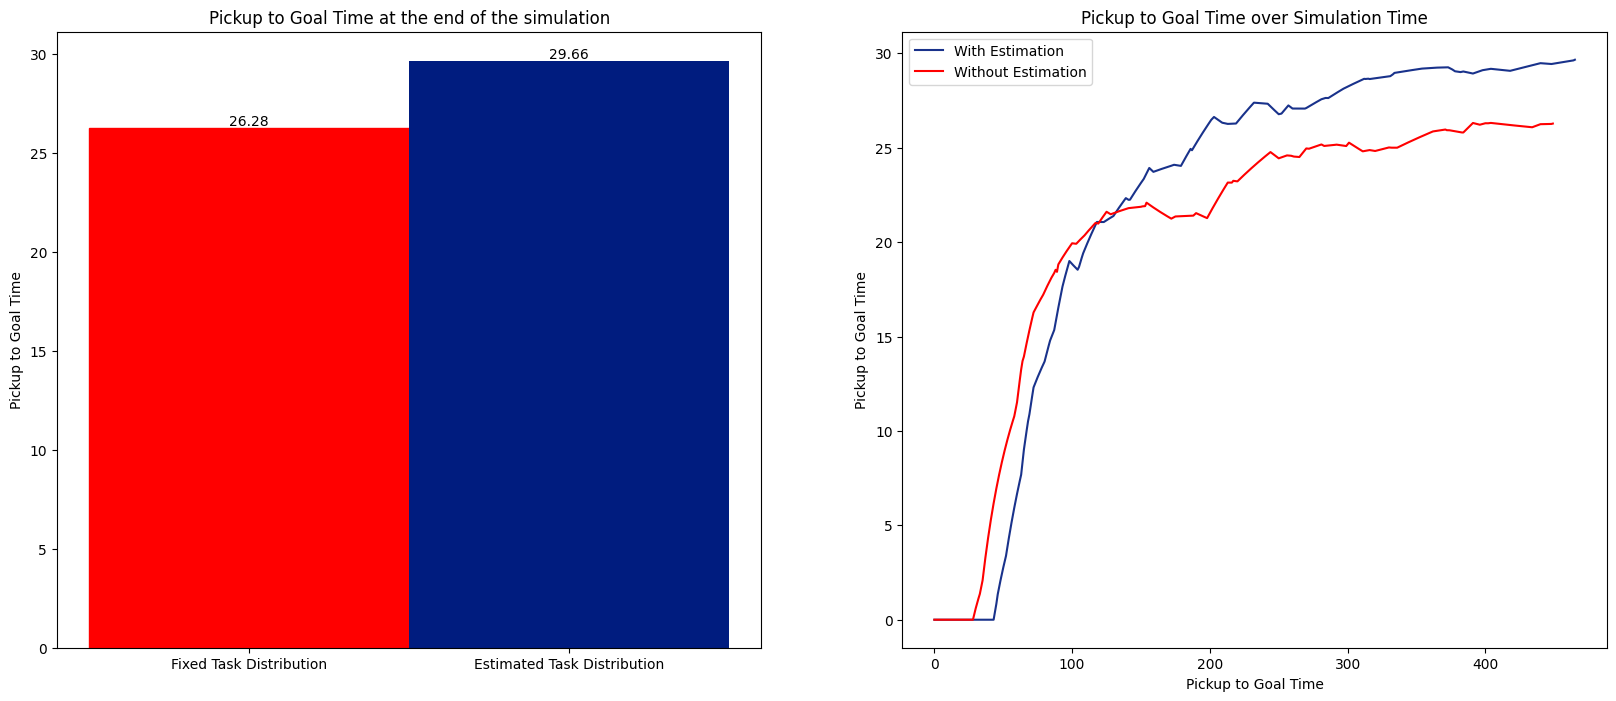

In [10]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["pickup_to_goal_times"].iloc[-1], df_learning["pickup_to_goal_times"].iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["pickup_to_goal_times"].iloc[-1]), "{:.2f}".format(df_learning["pickup_to_goal_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Pickup to Goal Time at the end of the simulation")
ax[0].set_ylabel("Pickup to Goal Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["pickup_to_goal_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["pickup_to_goal_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Pickup to Goal Time')
ax[1].set_xlabel('Pickup to Goal Time')
ax[1].set_title('Pickup to Goal Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()

Label(value='0s')

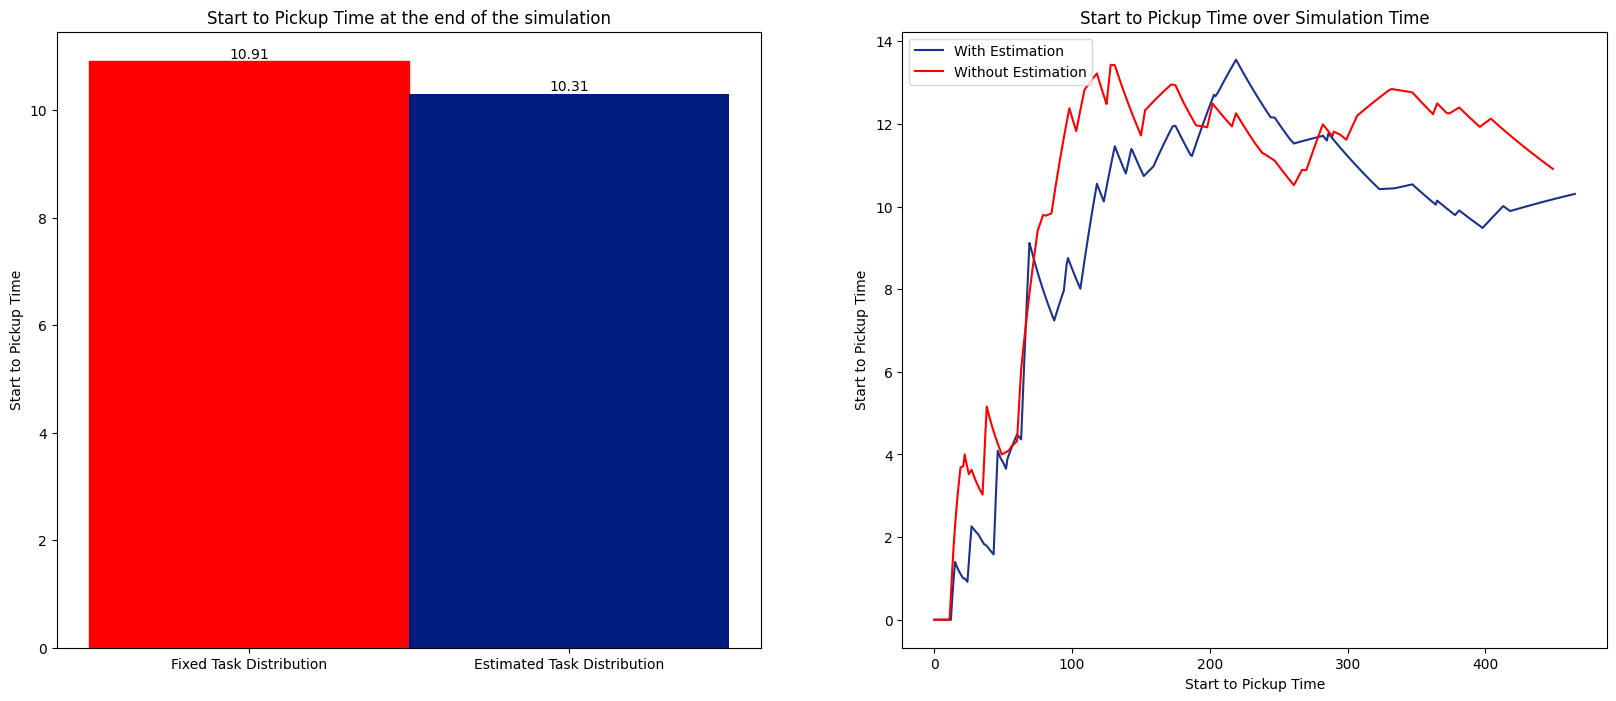

In [11]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["start_to_pickup_times"].iloc[-1], df_learning["start_to_pickup_times"].iloc[-1]], width=1,
                 align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["start_to_pickup_times"].iloc[-1]), "{:.2f}".format(df_learning["start_to_pickup_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Start to Pickup Time at the end of the simulation")
ax[0].set_ylabel("Start to Pickup Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["start_to_pickup_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["start_to_pickup_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Start to Pickup Time')
ax[1].set_xlabel('Start to Pickup Time')
ax[1].set_title('Start to Pickup Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()

Label(value='0s')

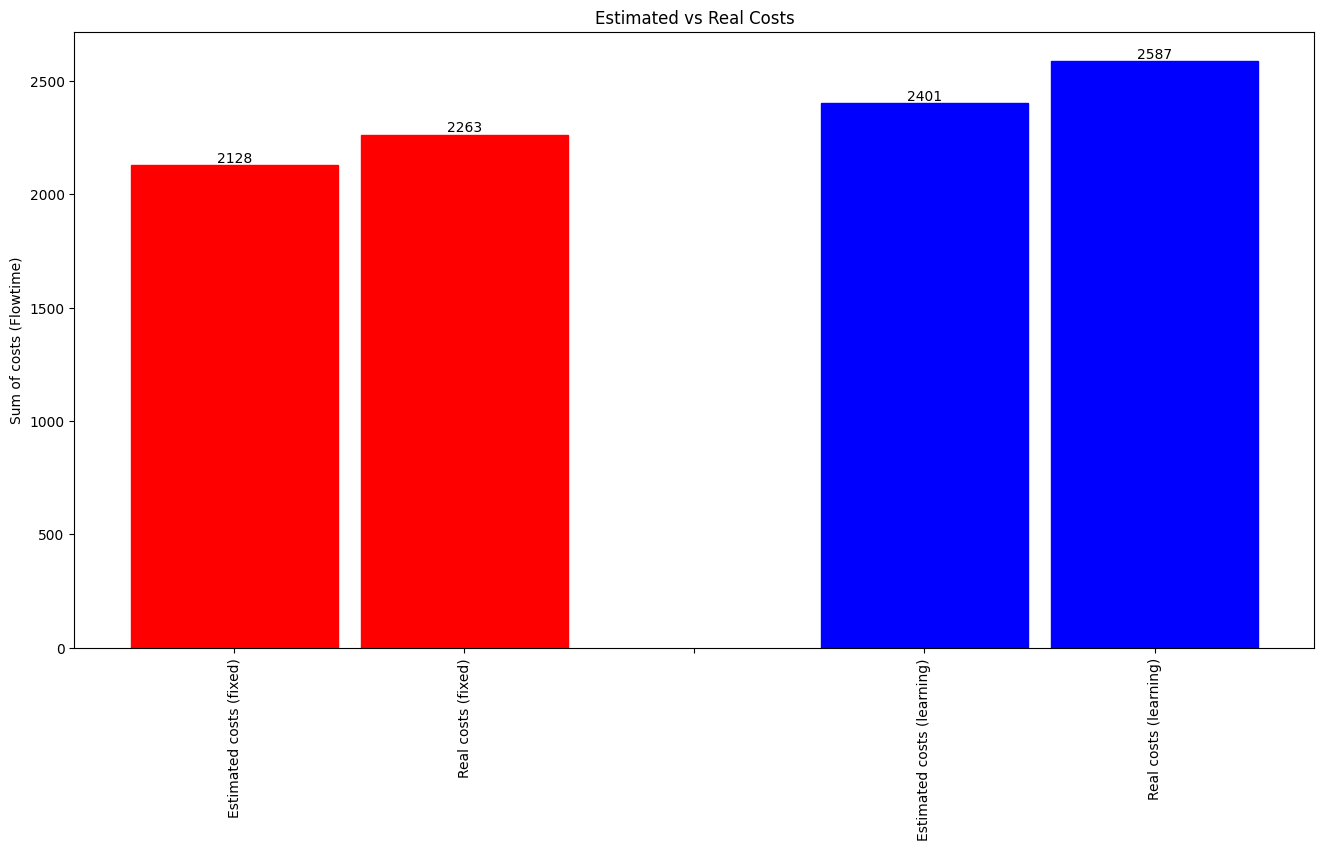

In [28]:
estimated_costs = dfCosts['estimated']
estimated_costs_learning = dfCostsLearning["estimated"]
real_costs = dfCosts['real']
real_costs_learning = dfCostsLearning["real"]

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

bars = ax.bar([0, 1, 2, 3, 4], [sum(estimated_costs), sum(real_costs), 0, sum(estimated_costs_learning), sum(real_costs_learning)], width=0.9, align='center')
ax.bar_label(bars, labels=[sum(estimated_costs), sum(real_costs), "", sum(estimated_costs_learning), sum(real_costs_learning)])
ax.set_xticks([0, 1, 2, 3, 4], labels=["Estimated costs (fixed)", "Real costs (fixed)", "", "Estimated costs (learning)", "Real costs (learning)"], rotation='vertical')
ax.set_title("Estimated vs Real Costs")
ax.set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')
bars[1].set_color('r')
bars[3].set_color('b')
bars[4].set_color('b')

plt.show()